## Polynomial Fitting [42 points] 
In this problem, we write a program to estimate the parameters for an unknown polynomial using the polyfit() function of the numpy package.  

```python=
## example code
import matplotlib.pyplot as plt 
plt.style.use('seaborn-whitegrid') 
import numpy as np 
noise_scale = 100 
number_of_samples = 50 
x =  30*(np.random.rand(number_of_samples, 1) - 0.5) 
y = 6 * x + 7 * x**2 + 3 * x**3 + noise_scale*np.random.randn(number_of_samples, 1) 
plt.plot(x,y,'ro') 
```

### 1. Please plot the noisy data and the polynomial you found (in the same figure). You can use any value of m selected from 1, 2, 3, 4, 5, 6. After plotting, explain how the choice of m influences the fit, considering concepts of overfitting and underfitting. 

In [30]:
# Personal repo: https://github.com/hogan-tech/SIT/blob/main/AppliedMachineLearning/HW1-1/hw1-2.ipynb
# Author: Hogan Lin
# Date: Sep 17/2024
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

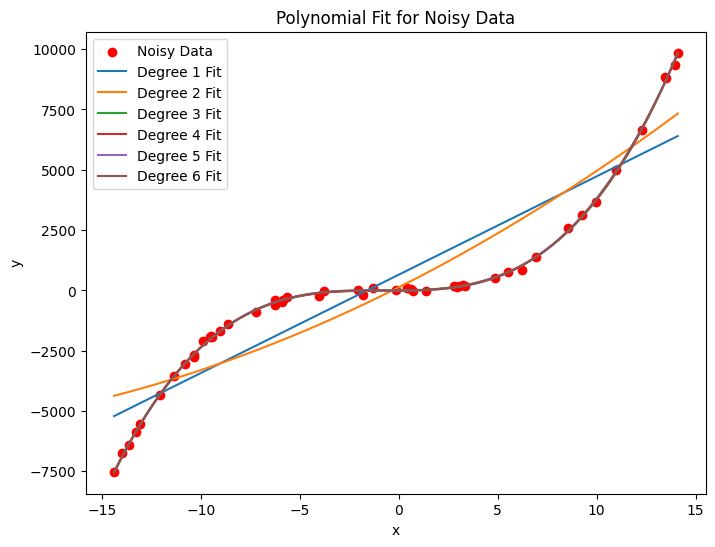

In [31]:
# Setting random seed for reproducibility
np.random.seed(42)

# Given variables
noiseScale = 100
numberOfSamples = 50

# Generate data

x = 30 * (np.random.rand(numberOfSamples, 1) - 0.5)
y = 6 * x + 7 * x**2 + 3 * x**3 + noiseScale * \
    np.random.randn(numberOfSamples, 1)

# Flatten x and y for easier usage
x = x.flatten()
y = y.flatten()

# Plot noisy data
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='red', label='Noisy Data')

# Polynomial fitting for different values of m from 1 ~ 6
for m in range(1, 7):
    coeffs = np.polyfit(x, y, m)
    poly = np.poly1d(coeffs)

    # Generate x and y for smooth plotting
    xVals = np.linspace(min(x), max(x), 100)
    yVals = poly(xVals)

    plt.plot(xVals, yVals, label=f'Degree {m} Fit')





plt.title('Polynomial Fit for Noisy Data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

### 2. Plot MSE versus order m, for m = 1, 2, 3, 4, 5, 6 respectively. Identify the best choice of m.

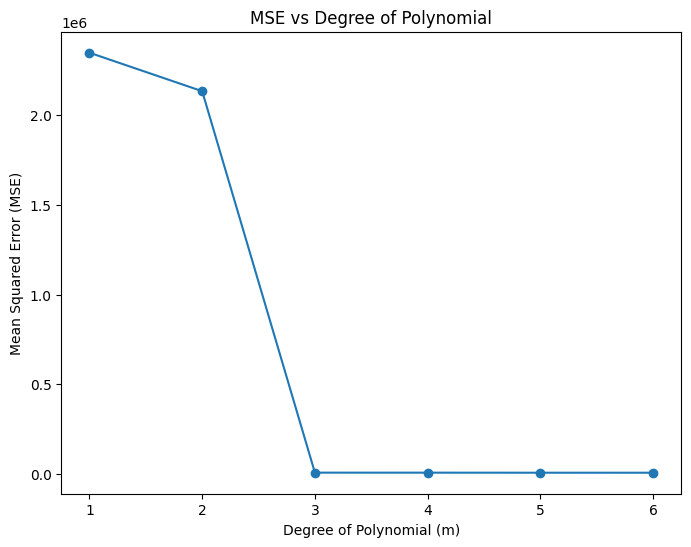

In [32]:
mseValues = []

plt.figure(figsize=(8, 6))

for m in range(1, 7):
    # Fit polynomial of degree m
    coeffs = np.polyfit(x, y, m)
    poly = np.poly1d(coeffs)
    
    # Predict values
    yPred = poly(x)
    
    # Use sklearn.metrics api to calculate MSE 
    mse = mean_squared_error(y, yPred)
    mseValues.append(mse)

plt.plot(range(1, 7), mseValues, marker='o')
plt.title('MSE vs Degree of Polynomial')
plt.xlabel('Degree of Polynomial (m)')
plt.ylabel('Mean Squared Error (MSE)')
plt.show()

### 3. Change variable noise_scale to 150, 250, 350, 550, 750, and 950 respectively, re-run the algorithm, and plot the polynomials with the best m found in (2). Discuss the impact of increasing noise on the accuracy and reliability of the polynomial parameters. How does the model's performance degrade with increasing noise?

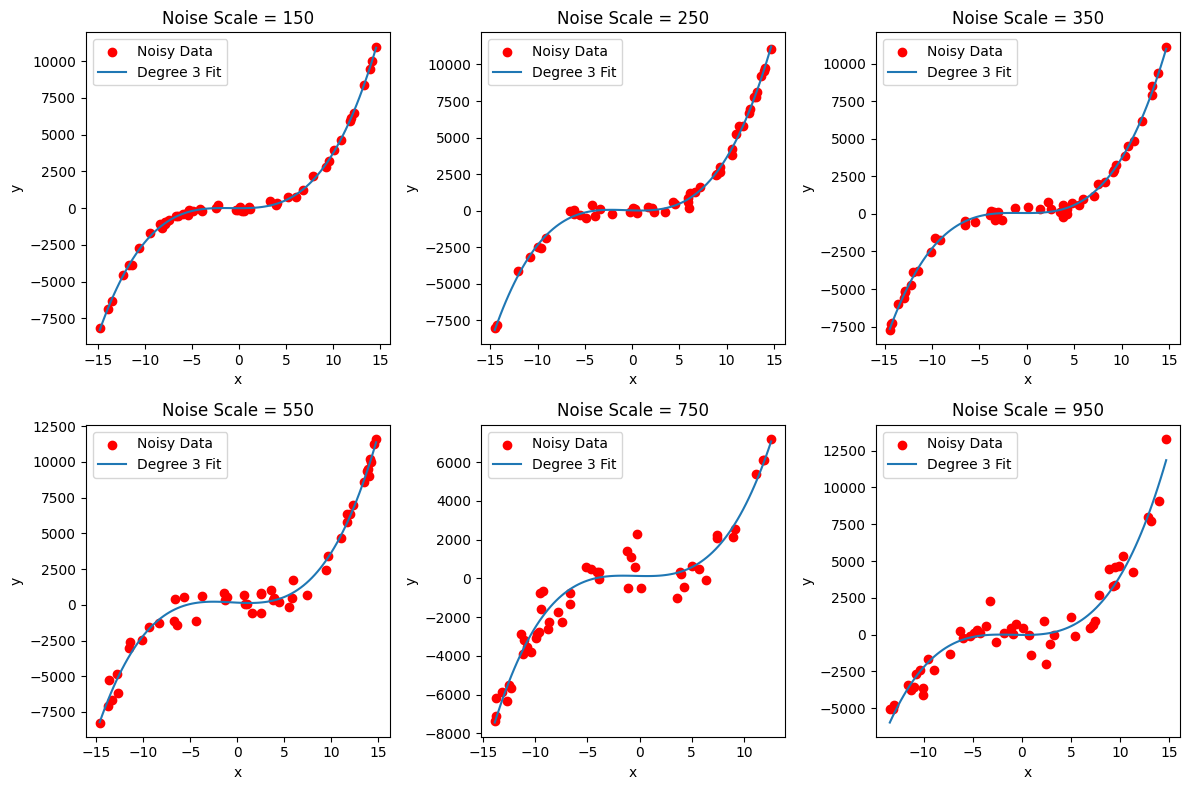

In [33]:
noise_levels = [150, 250, 350, 550, 750, 950]

plt.figure(figsize=(12, 8))

bestM = 3  # Assuming best degree from part 2

for i, noiseScale in enumerate(noise_levels):
    # Generate noisy data
    x = 30 * (np.random.rand(numberOfSamples, 1) - 0.5)
    y = 6 * x + 7 * x**2 + 3 * x**3 + noiseScale * \
        np.random.randn(numberOfSamples, 1)
    x = x.flatten()
    y = y.flatten()

    # Fit the polynomial with degree = bestM
    coeffs = np.polyfit(x, y, bestM)
    poly = np.poly1d(coeffs)

    # Plot data
    plt.subplot(2, 3, i + 1)
    plt.scatter(x, y, color='red', label='Noisy Data')

    # Generate values for smooth curve
    xVals = np.linspace(min(x), max(x), 100)
    yVals = poly(xVals)

    # Plot polynomial
    plt.plot(xVals, yVals, label=f'Degree {bestM} Fit')
    plt.title(f'Noise Scale = {noiseScale}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()

plt.tight_layout()
plt.show()